<a href="https://colab.research.google.com/github/bimal-bp/Credit_Risk_analysis/blob/ML_MODELS/Business_credit_risk_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.1 What Is Credit Risk?**

Credit risk is the possibility of a loss resulting from a borrower's failure to repay a loan or meet contractual obligations.
Credit risk, in simple words, is the risk that someone may not pay back the money they borrowed from you. It's like when you lend money to a friend, and you're not sure if they will give it back. In the financial world, banks and other lenders face credit risk when they lend money to individuals, companies, or governments, as there's always a chance that the borrower might not be able to repay the loan. To manage this risk, lenders often assess the borrower's creditworthiness by looking at their credit history, income, and other factors before deciding to lend them money.

**1.2 What Factors are Used to Assess Credit Risk?**

In order to assess the credit risk associated with any financial proposal, the project finance division of the firm first assesses a variety of risks relating -
Credit risk is assessed by looking at various factors that help lenders determine how likely a borrower is to repay their loan. In simple words, these factors include:

Credit History: This is like your financial report card. Lenders check if you've borrowed money before and if you paid it back on time. If you've had late payments or debts, it can affect your credit risk.

Income: Lenders want to know how much money you make because it helps them understand if you can afford to repay the loan. If you earn a good income, it reduces the risk.

Debt Level: If you already owe a lot of money, lenders might worry that you won't be able to handle more debt. So, they look at how much you owe compared to how much you earn.

Employment Stability: Having a stable job or source of income is a plus because it shows you have a consistent way to repay the loan.

Collateral: Sometimes, lenders ask for something valuable, like a car or house, that they can take if you don't repay the loan. This is called collateral and can reduce the risk for the lender.

Credit Score: This is like a numerical summary of your credit history. It helps lenders quickly gauge your credit risk. A higher score is better.

**1.3 What Is Credit Risk Management?**

Credit risk management is the practice of mitigating losses by understanding the adequacy of a bank’s capital and loan loss reserves at any given time – a process that has long been a challenge for financial institutions.

The global financial crisis – and the credit crunch that followed – put credit risk management into the regulatory spotlight. As a result, regulators began to demand more transparency. They wanted to know that a bank has thorough knowledge of customers and their associated credit risk. And new Basel III regulations will create an even bigger regulatory burden for banks.

To comply with the more stringent regulatory requirements and absorb the higher capital costs for credit risk, many banks are overhauling their approaches to credit risk. But banks who view this as strictly a compliance exercise are being short-sighted. Better credit risk management also presents an opportunity to greatly improve overall performance and secure a competitive advantage.

**1.4 Challenges to Successful Credit Risk Management**

Inefficient data management. An inability to access the right data when it’s needed causes problematic delays.

No groupwide risk modeling framework. Without it, banks can’t generate complex, meaningful risk measures and get a big picture of groupwide risk.

Constant rework. Analysts can’t change model parameters easily, which results in too much duplication of effort and negatively affects a bank’s efficiency ratio.

Insufficient risk tools. Without a robust risk solution, banks can’t identify portfolio concentrations or re-grade portfolios often enough to effectively manage risk.

Cumbersome reporting. Manual, spreadsheet-based reporting processes overburden analysts and IT.

In [1]:
# data manipulation
import pickle
import pandas as pd
import numpy as np

# EDA
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import chi2_contingency


# data preprocessing
from sklearn.preprocessing import MinMaxScaler

# feature selection
from sklearn.ensemble import RandomForestClassifier


# machine learning
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline
from scipy import stats

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
!pip install catboost

from catboost import CatBoostClassifier

# model evaluation
from sklearn.metrics import classification_report, precision_recall_fscore_support, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, brier_score_loss
from sklearn.model_selection import StratifiedKFold, cross_val_score

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# model calibration
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.8 MB/s eta 0:00:00


In [2]:
df_cr_loan = pd.read_csv('/content/drive/MyDrive/raw_cr_loan2.csv')

# checks the first five rows of the data
df_cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
# checks the structure of the data set
df_cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
# creates a dataset for numerical attributes
num_attributes = df_cr_loan.select_dtypes(include=['int64', 'float64'])

# creates a dataset for categorical attributes
cat_attributes = df_cr_loan.select_dtypes(exclude=['int64', 'float64'])

In [5]:
df_cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


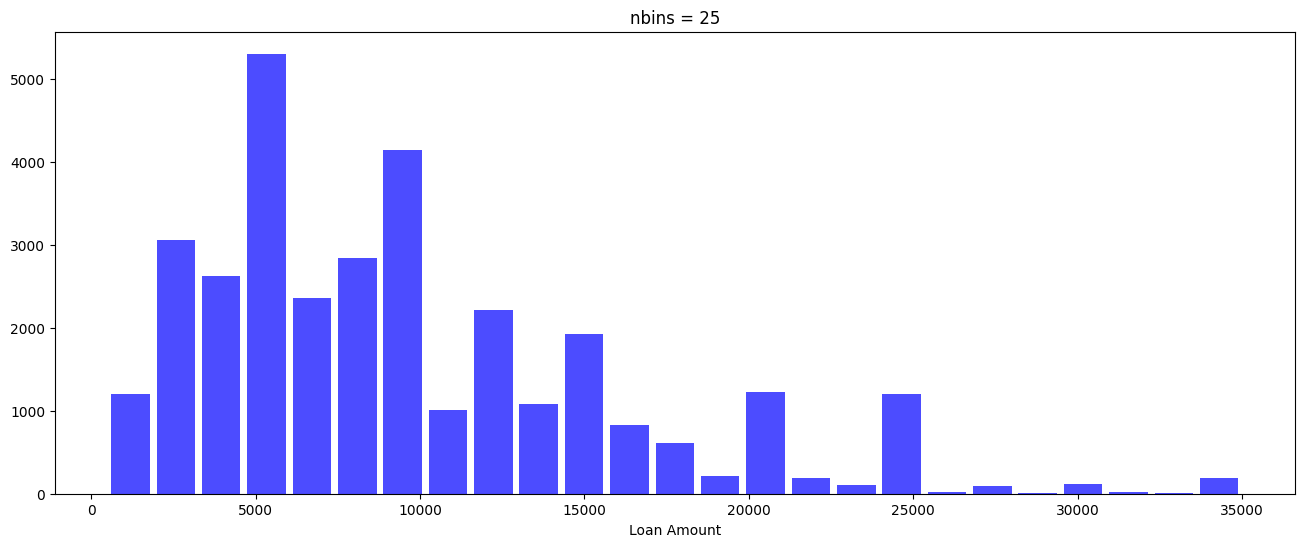

In [6]:
# looks at the distribution of loan amounts with a histogram
plt.figure(figsize=(16, 6))
n, bins, patches = plt.hist(x=df_cr_loan['loan_amnt'], bins=25, color='blue', alpha=0.7, rwidth=0.85)
plt.title("nbins = 25")
plt.xlabel("Loan Amount")

plt.show()

In [7]:
# checks how many types we have for each atribute
cat_attributes.apply(lambda x: x.unique().shape[0])

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

In [8]:
# creates a cross table of the loan intent and loan status
pd.crosstab(df_cr_loan['loan_intent'], df_cr_loan['loan_status'], margins=True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


- VENTURE has the least number of defaults while MEDICAL has the most.

- EDUCATION and MEDICAL are the greatest loan intents while HOMEIMPROVEMENT is
the least.

- MEDICAL and DEBTCONSOLIDATION are the intents where there are more defaults.

In [9]:
# creates a cross table of home ownership, loan status, and grade
pd.crosstab(df_cr_loan['person_home_ownership'], [df_cr_loan['loan_status'], df_cr_loan['loan_grade']],
            margins=True)

loan_status               0                                   1              \
loan_grade                A     B     C     D    E   F  G     A     B     C   
person_home_ownership                                                         
MORTGAGE               5219  3729  1934   658  178  36  0   239   324   321   
OTHER                    23    29    11     9    2   0  0     3     5     6   
OWN                     860   770   464   264   26   7  0    66    34    31   
RENT                   3602  4222  2710   554  137  28  1   765  1338   981   
All                    9704  8750  5119  1485  343  71  1  1073  1701  1339   

loan_status                                  All  
loan_grade                D    E    F   G         
person_home_ownership                             
MORTGAGE                553  161   61  31  13444  
OTHER                    11    6    2   0    107  
OWN                      18   31    8   5   2584  
RENT                   1559  423   99  27  16446  
All                    2141  621  170  63  32581

In [10]:
# creates a cross table of home ownership, loan status, and average percent income
pd.crosstab(df_cr_loan['person_home_ownership'], df_cr_loan['loan_status'],
              values=df_cr_loan['loan_percent_income'], aggfunc='mean')

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


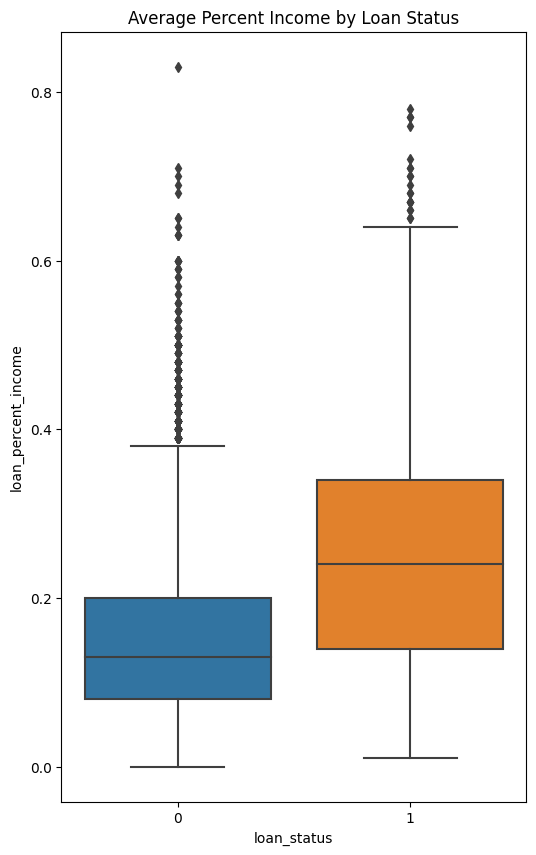

In [11]:
# creates a box plot of percentage income by loan status
plt.figure(figsize=(6, 10))

plt.title('Average Percent Income by Loan Status')
plt.suptitle('')

sns.boxplot(x='loan_status' , y='loan_percent_income', data=df_cr_loan)

plt.show()

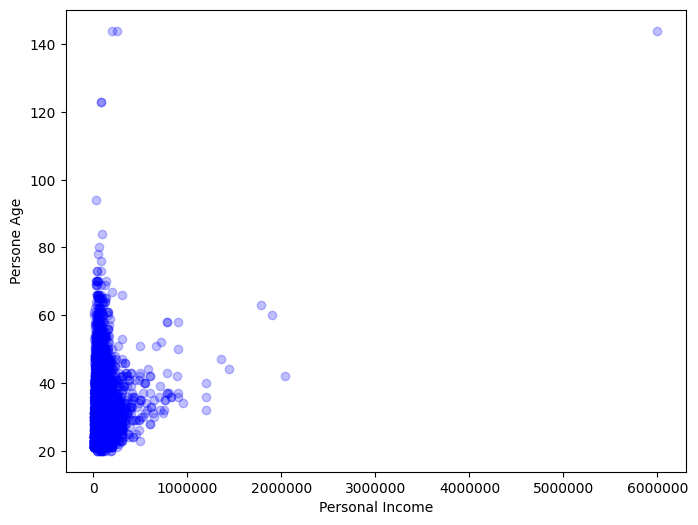

In [12]:
# plots a scatter plot of income against age
plt.figure(figsize=(8, 6))

plt.scatter(df_cr_loan['person_income'], df_cr_loan['person_age'], color='blue', alpha=0.25)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')

# prevents scientific notation on axis
plt.ticklabel_format(useOffset=False, style='plain')

plt.show()

In [13]:

# creates the cross table for loan status, home ownership, and the max employment length
pd.crosstab(df_cr_loan['loan_status'],df_cr_loan['person_home_ownership'],
        values=df_cr_loan['person_emp_length'], aggfunc='max')

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,123.0,24.0,31.0,41.0
1,34.0,11.0,17.0,123.0


In [14]:
# creates an array of indices where employment length is greater than 60
indices = df_cr_loan[df_cr_loan['person_emp_length'] > 60].index
indices

Int64Index([0, 210], dtype='int64')

In [15]:
# checks which records will be dropped
df_cr_loan.loc[[0, 210]]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [16]:
# drops the records from the data based on the indices and create a new dataframe
df_cr_loan_new = df_cr_loan.drop(indices)

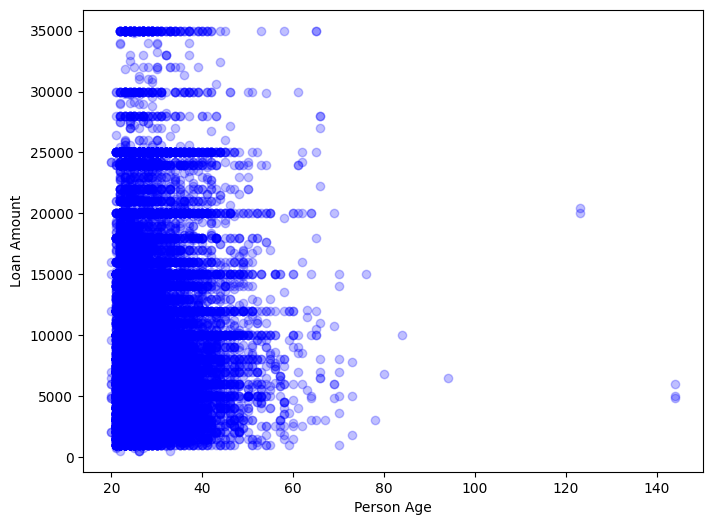

In [17]:
# creates the scatter plot for age and amount
plt.figure(figsize=(8, 6))
plt.scatter(df_cr_loan_new['person_age'], df_cr_loan_new['loan_amnt'], color='blue', alpha=0.25)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

In [18]:

# uses pandas to drop the record from the data frame and create a new one
df_cr_loan_new = df_cr_loan_new.drop(df_cr_loan_new[df_cr_loan_new['person_age'] > 100].index)

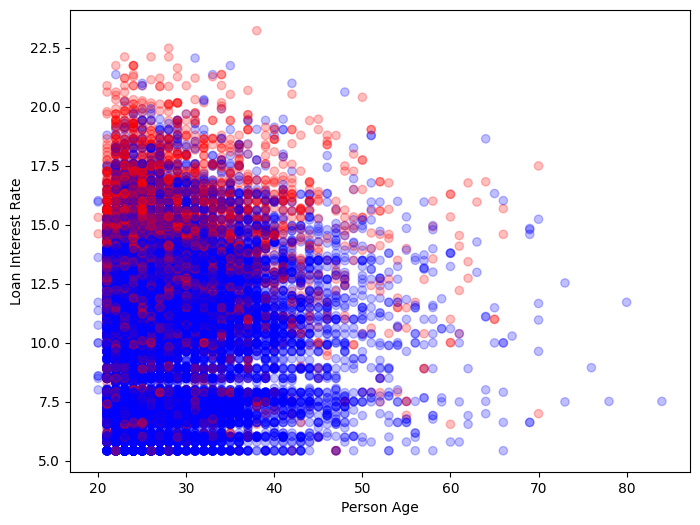

In [19]:
# creates a scatter plot of age and interest rate
colors = ["blue","red"]
plt.figure(figsize=(8, 6))
plt.scatter(df_cr_loan_new['person_age'], df_cr_loan_new['loan_int_rate'],
            c = df_cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.25)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

In [20]:
# overwrites the raw data set
df_cr_loan = df_cr_loan_new.copy()

In [21]:

# prints the cols that contain null values
df_cr_loan.columns[df_cr_loan.isnull().any()]

Index(['person_emp_length', 'loan_int_rate'], dtype='object')

In [22]:
# checks how many null records for each column
df_cr_loan.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [23]:
# prints the top five rows with nulls for employment length
df_cr_loan[df_cr_loan['person_emp_length'].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


In [24]:
# imputes the null values with the median value for all employment lengths
df_cr_loan['person_emp_length'].fillna((df_cr_loan['person_emp_length'].median()), inplace=True)

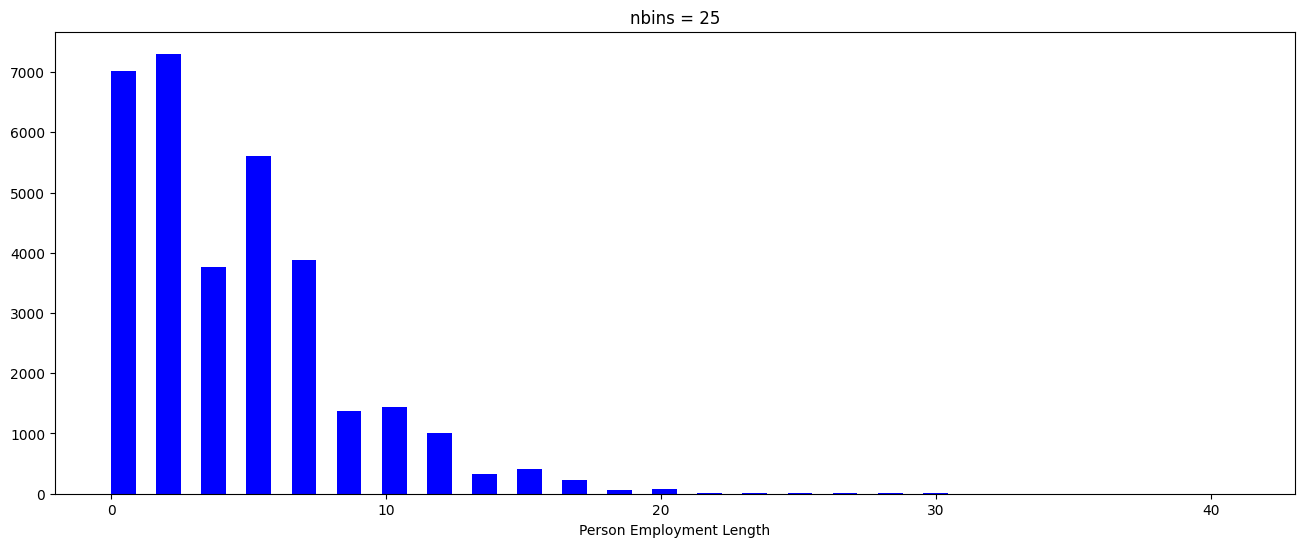

In [25]:
# creates a histogram of employment length
plt.figure(figsize=(16, 6))
n, bins, patches = plt.hist(df_cr_loan['person_emp_length'], bins=25, color='blue',width=0.9)
plt.xlabel("Person Employment Length")
plt.title("nbins = 25")

plt.show()

In [26]:
# prints the number of nulls
print(df_cr_loan['loan_int_rate'].isnull().sum())

3115


In [27]:
# stores the array on indices
indices = df_cr_loan[df_cr_loan['loan_int_rate'].isnull()].index


In [28]:
# saves the new data without missing data
df_cr_loan_clean = df_cr_loan.drop(indices)

In [29]:
# counts the number of records for each unique value
df_cr_loan_clean['person_home_ownership'].value_counts()

RENT        14890
MORTGAGE    12119
OWN          2356
OTHER          94
Name: person_home_ownership, dtype: int64

In [30]:
# checks the cleaned data set
df_cr_loan_clean.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [31]:
df_cr_loan_clean.shape

(29459, 12)

In [32]:
df_cr_loan_clean['loan_status'].value_counts()

0    22996
1     6463
Name: loan_status, dtype: int64

In [33]:
df_cr_loan=df_cr_loan_clean.copy()

In [34]:
# separating the data set for easier analysis
df_default = df_cr_loan[df_cr_loan['loan_status'] == 1].copy()
df_non_default = df_cr_loan[df_cr_loan['loan_status'] == 0].copy()

In [35]:
# counts the number of defaults and non-defaults
total_default = df_default.shape[0]
total_non_default = df_non_default.shape[0]
total_loans = df_cr_loan.shape[0]

print('Number of default cases:', total_default)
print('This is equivalent to {:.2f}% of the total loans'.format((total_default/total_loans)*100))

print('\nNumber of non-defualt cases:', total_non_default)
print('This is equivalent to {:.2f}% of the total loans'.format((total_non_default/total_loans)*100))

Number of default cases: 6463
This is equivalent to 21.94% of the total loans

Number of non-defualt cases: 22996
This is equivalent to 78.06% of the total loans


In [36]:
# creates a dataset for numerical attributes
num_attributes = df_cr_loan.select_dtypes(include=['int64', 'float64'])

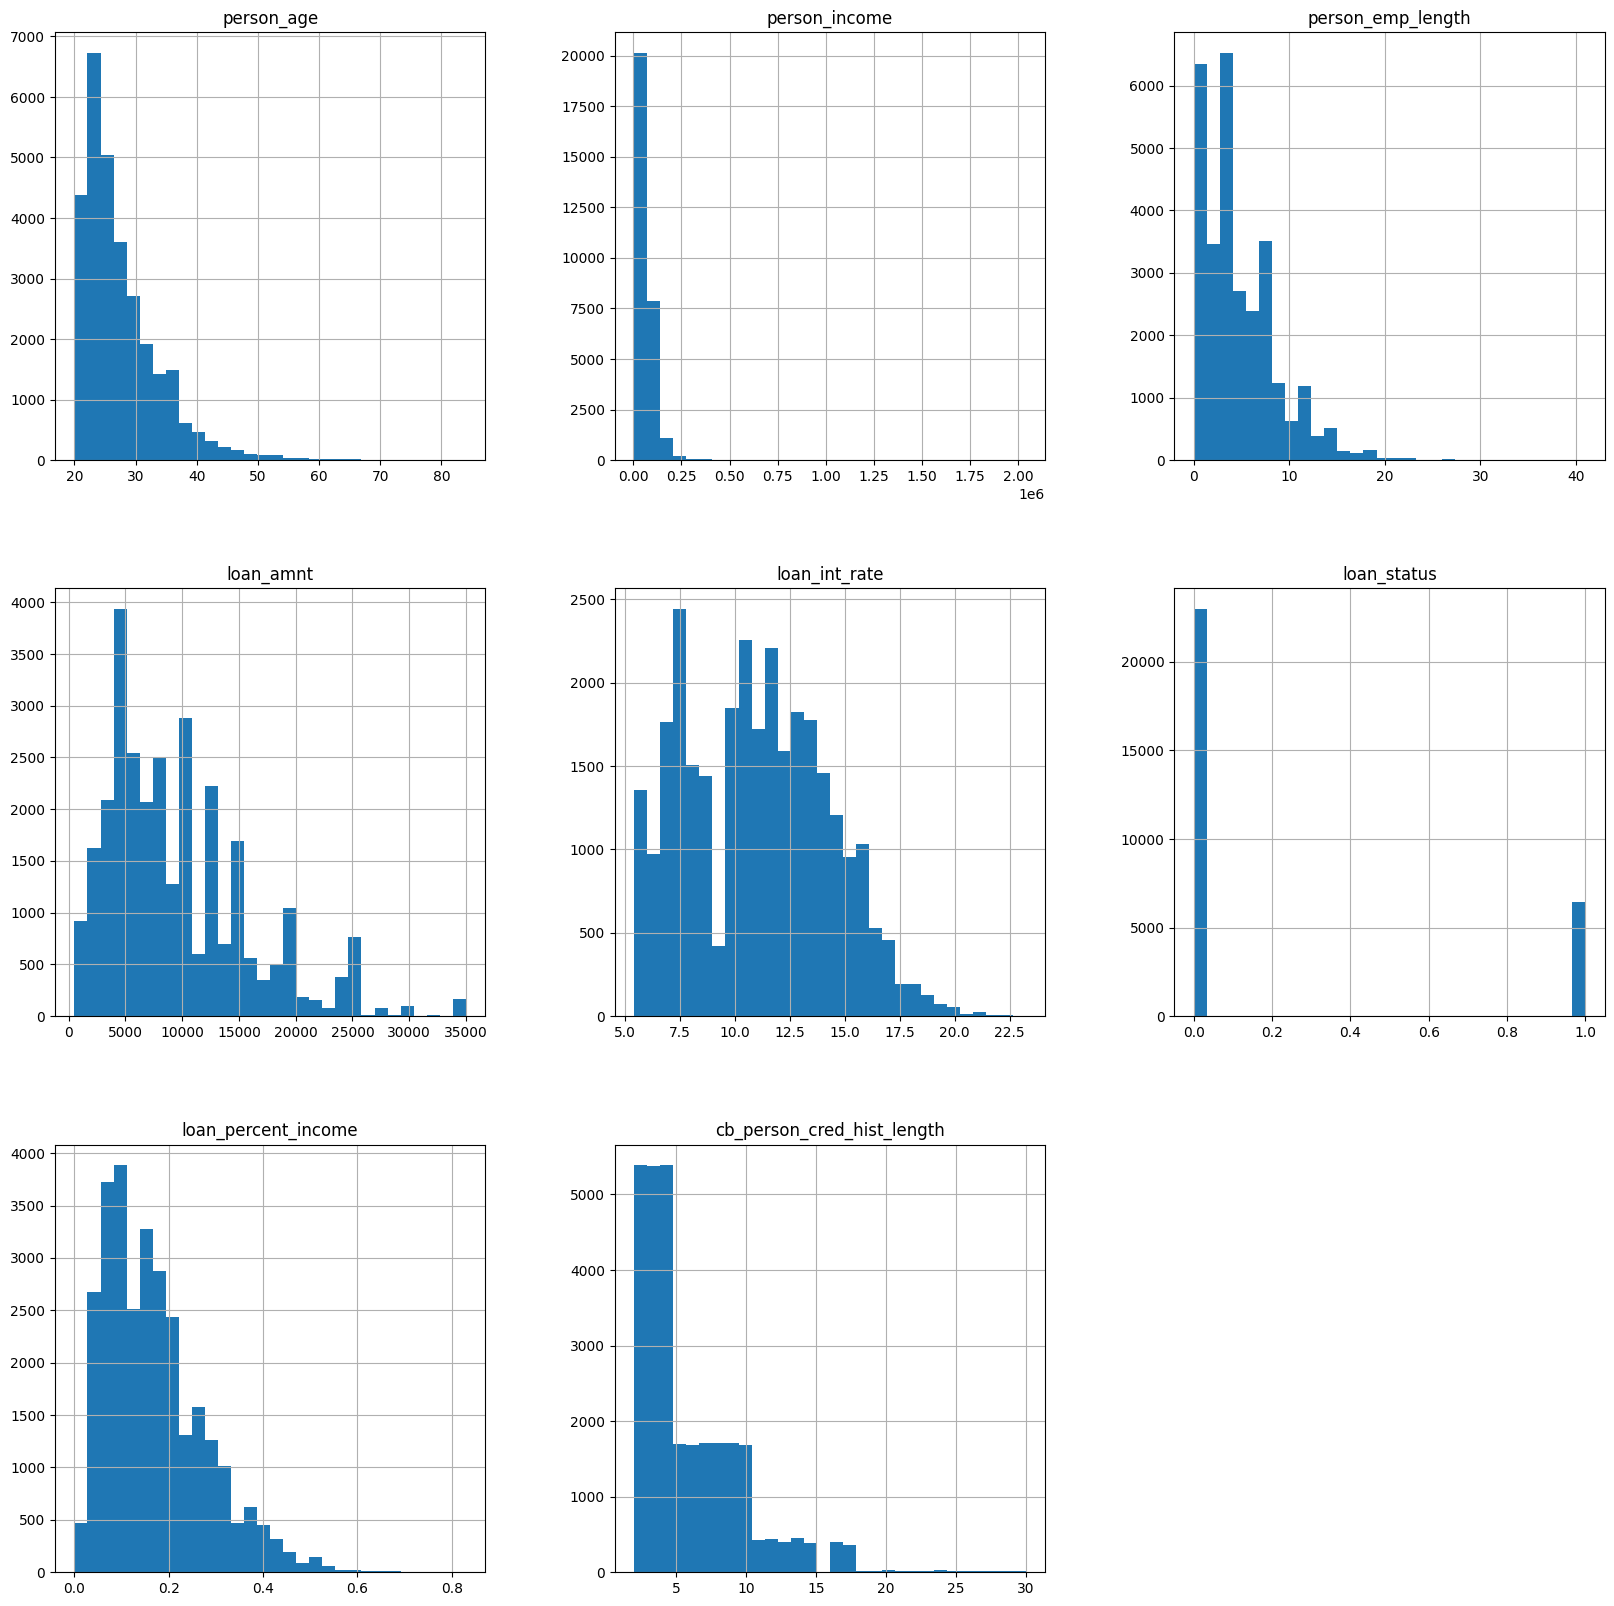

In [37]:
# plots a histogram for all numerical attributes
_ = num_attributes.hist(bins=30, figsize=(20,20))

In [38]:
# creates a dataset for categorical attributes
cat_attributes = df_cr_loan.select_dtypes(exclude=['int64', 'float64'])

<ipython-input-39-7a70bb19c39f>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, 1)


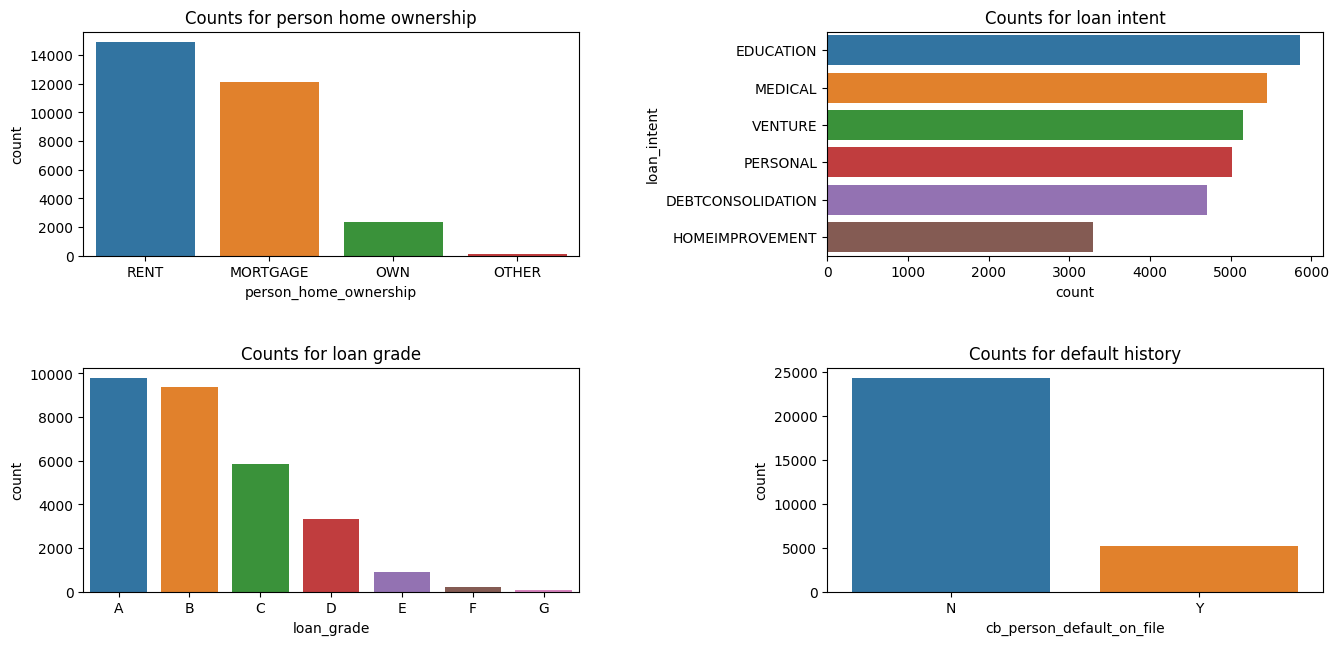

In [39]:
# uses the variable ax for a single Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(16, 16)

# person_home_ownership
plt.subplot(4, 2, 1)
sns.countplot(x=cat_attributes['person_home_ownership'],
              order=cat_attributes['person_home_ownership'].value_counts().index)
plt.title("Counts for person home ownership")

# loan_intent
plt.subplot(4, 2, 2)
sns.countplot(y=cat_attributes['loan_intent'],
              order=cat_attributes['loan_intent'].value_counts().index)
plt.title("Counts for loan intent")

# loan_grade
plt.subplot(4, 2, 3)
sns.countplot(x=cat_attributes['loan_grade'],
              order=cat_attributes['loan_grade'].value_counts().index)
plt.title("Counts for loan grade")

# cb_person_default_on_file
plt.subplot(4, 2, 4)
sns.countplot(x=cat_attributes['cb_person_default_on_file'],
              order=cat_attributes['cb_person_default_on_file'].value_counts().index)
plt.title("Counts for default history")

# adjusts vertical space between plots
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.5)

# display plots
plt.show()

<ipython-input-40-6ff75e4a6d92>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlation, dtype=np.bool))


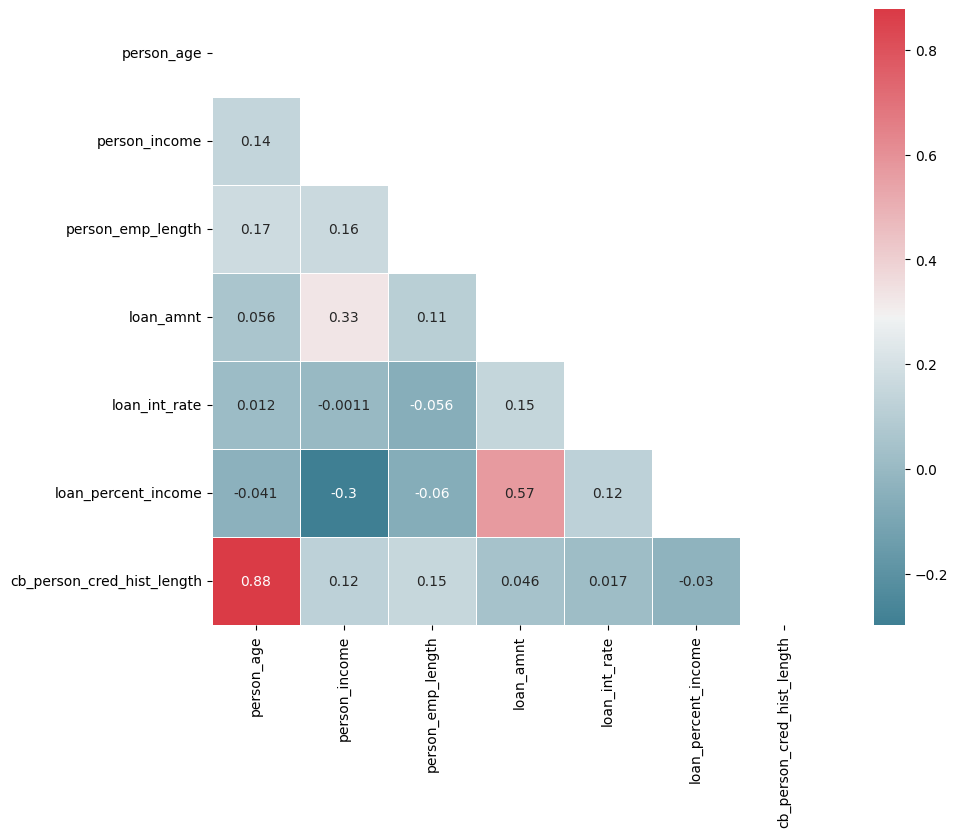

In [40]:
# drops target var
num_attributes = num_attributes.drop('loan_status', axis=1)
# gets the correlation between the numerical variables
correlation = num_attributes.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(12, 8)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(correlation, cmap=cmap, mask=mask, square=True, linewidths=.5, annot=True)

# displays the plot
plt.show()

scaling

In [41]:
df_numerical_vars = df_cr_loan.select_dtypes(include=['int64', 'float64']).drop('loan_status', axis=1)


In [42]:
import os

directory = 'parameter'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)


In [43]:
# instantiates the scaler
mms = MinMaxScaler()

# applies the scaler
scaled_numerical = mms.fit_transform(df_numerical_vars)

# saves the rescaling
pickle.dump(mms, open('parameter/numerical_vars_scaler.pkl', 'wb'))

In [44]:
# gets the Data Frame version of numerical scaled for later manipulation
df_scaled_numerical = pd.DataFrame(scaled_numerical)

# renaming the columns of result Data Frame
df_scaled_numerical.columns = df_numerical_vars.columns

In [45]:
# checks data set size
df_scaled_numerical.shape

(29459, 7)

In [46]:
# creates data sets for non-numeric data
cred_str = df_cr_loan.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# union the one-hot encoded columns to the numeric ones
df_cr_loan_prep = pd.concat([df_scaled_numerical, cred_str_onehot], axis=1)

# prints the columns in the new data set
print(df_cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_N',
       'cb_person_default_on_file_Y'],
      dtype='object')


In [47]:
# stores the loan status
loan_status = df_cr_loan[['loan_status']].copy()

In [48]:
# joins target and all explain vars
df_cr_loan_prep = pd.concat([loan_status, df_cr_loan_prep], axis=1)

In [49]:
# checks the data set info
df_cr_loan_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32243 entries, 1 to 29452
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_status                     29459 non-null  float64
 1   person_age                      29459 non-null  float64
 2   person_income                   29459 non-null  float64
 3   person_emp_length               29459 non-null  float64
 4   loan_amnt                       29459 non-null  float64
 5   loan_int_rate                   29459 non-null  float64
 6   loan_percent_income             29459 non-null  float64
 7   cb_person_cred_hist_length      29459 non-null  float64
 8   person_home_ownership_MORTGAGE  29459 non-null  float64
 9   person_home_ownership_OTHER     29459 non-null  float64
 10  person_home_ownership_OWN       29459 non-null  float64
 11  person_home_ownership_RENT      29459 non-null  float64
 12  loan_intent_DEBTCONSOLIDATION   

In [50]:
# Specify the columns to convert to int64
columns_to_convert = [
    'loan_status',
    'person_home_ownership_MORTGAGE',
    'person_home_ownership_OTHER',
    'person_home_ownership_OWN',
    'person_home_ownership_RENT',
    'loan_intent_DEBTCONSOLIDATION',
    'loan_intent_EDUCATION',
    'loan_intent_HOMEIMPROVEMENT',
    'loan_intent_MEDICAL',
    'loan_intent_PERSONAL',
    'loan_intent_VENTURE',
    'loan_grade_A',
    'loan_grade_B',
    'loan_grade_C',
    'loan_grade_D',
    'loan_grade_E',
    'loan_grade_F',
    'loan_grade_G',
    'cb_person_default_on_file_N',
    'cb_person_default_on_file_Y'
]
df_cr_loan_prep[columns_to_convert] = df_cr_loan_prep[columns_to_convert].fillna(0).astype('int64')

# Convert the specified columns to int64
df_cr_loan_prep[columns_to_convert] = df_cr_loan_prep[columns_to_convert].astype('int64')


In [51]:
df_cr_loan_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32243 entries, 1 to 29452
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_status                     32243 non-null  int64  
 1   person_age                      29459 non-null  float64
 2   person_income                   29459 non-null  float64
 3   person_emp_length               29459 non-null  float64
 4   loan_amnt                       29459 non-null  float64
 5   loan_int_rate                   29459 non-null  float64
 6   loan_percent_income             29459 non-null  float64
 7   cb_person_cred_hist_length      29459 non-null  float64
 8   person_home_ownership_MORTGAGE  32243 non-null  int64  
 9   person_home_ownership_OTHER     32243 non-null  int64  
 10  person_home_ownership_OWN       32243 non-null  int64  
 11  person_home_ownership_RENT      32243 non-null  int64  
 12  loan_intent_DEBTCONSOLIDATION   

In [52]:
df_cr_loan_prep.dropna()

,loan_status,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,0,0.078125,0.002751,0.024390,0.144928,0.418539,0.686747,0.035714,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0.046875,0.030209,0.097561,1.000000,0.551124,0.638554,0.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0.062500,0.024757,0.195122,1.000000,0.497191,0.662651,0.071429,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0.015625,0.002898,0.048780,0.057971,0.096629,0.301205,0.000000,0,0,...,0,0,0,1,0,0,0,0,0,1
5,1,0.093750,0.035908,0.195122,1.000000,0.393258,0.542169,0.035714,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29399,0,0.500000,0.047156,0.097561,0.275362,0.250562,0.120482,0.821429,0,0,...,0,0,0,0,0,0,0,0,0,0
29405,0,0.484375,0.054967,0.390244,0.333333,0.138202,0.120482,0.964286,0,0,...,0,0,0,0,0,0,0,0,0,0
29408,0,0.781250,0.021613,0.000000,0.420290,0.088202,0.373494,0.785714,0,0,...,0,0,0,0,0,0,0,0,0,0
29419,0,0.875000,0.034876,0.560976,0.420290,0.197753,0.240964,0.821429,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_cr_loan_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32243 entries, 1 to 29452
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_status                     32243 non-null  int64  
 1   person_age                      29459 non-null  float64
 2   person_income                   29459 non-null  float64
 3   person_emp_length               29459 non-null  float64
 4   loan_amnt                       29459 non-null  float64
 5   loan_int_rate                   29459 non-null  float64
 6   loan_percent_income             29459 non-null  float64
 7   cb_person_cred_hist_length      29459 non-null  float64
 8   person_home_ownership_MORTGAGE  32243 non-null  int64  
 9   person_home_ownership_OTHER     32243 non-null  int64  
 10  person_home_ownership_OWN       32243 non-null  int64  
 11  person_home_ownership_RENT      32243 non-null  int64  
 12  loan_intent_DEBTCONSOLIDATION   

In [54]:
df_cr_loan_prep.shape

(32243, 27)

In [55]:
# Drop rows with NaN values in the specified columns
df_cr_loan_prep = df_cr_loan_prep.dropna(subset=['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])

# Reset the index after dropping rows
df_cr_loan_prep = df_cr_loan_prep.reset_index(drop=True)


In [56]:
# creates the X and y data sets
X = df_cr_loan_prep.drop('loan_status', axis=1).values
y = df_cr_loan_prep['loan_status'].values

# splits into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                        random_state=42, stratify=y)

In [57]:
# counts the number of classes before oversampling
print('Before balancing:', Counter(y_train))
from imblearn.over_sampling import RandomOverSampler
# Balance the classes using RandomOverSampler
resampler = RandomOverSampler(random_state=42)  # Set SEED to your desired random seed
X_balanced, y_balanced = resampler.fit_resample(X, y)

# Check the class distribution after balancing
from collections import Counter
print(Counter(y_balanced))







# counts the number of classes after oversampling
print('After balancing:', Counter(y_balanced))

Before balancing: Counter({0: 17644, 1: 4450})
Counter({0: 23525, 1: 23525})
After balancing: Counter({0: 23525, 1: 23525})


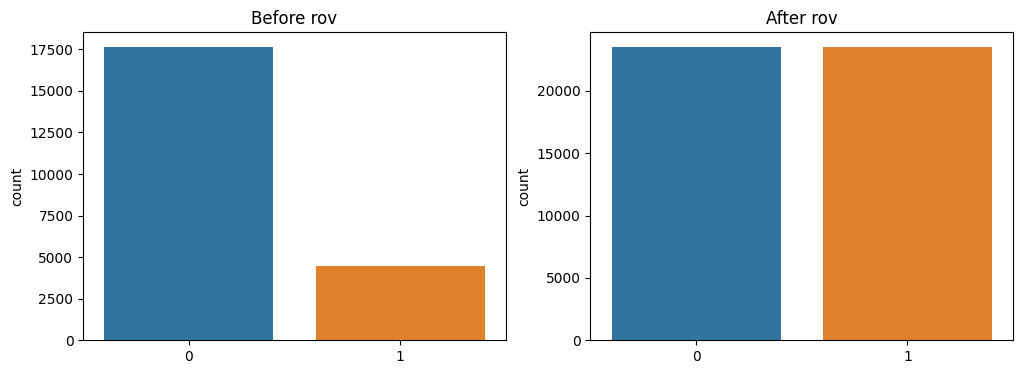

In [58]:
# plots before and after SMOTE
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(x=y_train)
plt.title("Before rov")

plt.subplot(1,2,2)
sns.countplot(x=y_balanced)
plt.title("After rov")

plt.show()

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from catboost import CatBoostClassifier
SEED=42
# Define a list of classifiers
classifiers = [LogisticRegression(max_iter=220, random_state=SEED),
               xgb.XGBClassifier(random_state=SEED),
               ]

# Iterate through each classifier
for classifier in classifiers:
    # Train the classifier on your data
    classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = classifier.predict(X_test)

    # Calculate and print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Classifier: {classifier.__class__.__name__}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 score:", f1)
    print()


Classifier: LogisticRegression
Accuracy: 0.8505091649694501
Precision: 0.7598371777476255
Recall: 0.37735849056603776
F1 score: 0.5042773525438992

Classifier: XGBClassifier
Accuracy: 0.8506449422946368
Precision: 0.7546419098143236
Recall: 0.3834231805929919
F1 score: 0.5084897229669347



In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from catboost import CatBoostClassifier

# Define a list of classifiers
classifiers = [
               RandomForestClassifier(random_state=SEED),

               ]

# Iterate through each classifier
for classifier in classifiers:
    # Train the classifier on your data
    classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = classifier.predict(X_test)

    # Calculate and print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Classifier: {classifier.__class__.__name__}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 score:", f1)
    print()


Classifier: RandomForestClassifier
Accuracy: 0.8530889341479972
Precision: 0.7644736842105263
Recall: 0.3915094339622642
F1 score: 0.517825311942959



In [61]:
from catboost import CatBoostClassifier

# Create CatBoostClassifier with verbose=False
classifier = CatBoostClassifier(random_state=SEED, verbose=False)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Classifier: CatBoostClassifier")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Classifier: CatBoostClassifier
Accuracy: 0.8543109300746775
Precision: 0.7931526390870185
Recall: 0.3746630727762803
F1 score: 0.5089244851258581


In [62]:
lr_clf = LogisticRegression(max_iter=220, random_state=SEED)
rf_clf = RandomForestClassifier(random_state=SEED)
xgb_clf = xgb.XGBClassifier(random_state=SEED)
catb_clf = CatBoostClassifier(random_state=SEED, verbose=False)


# trains the classifiers
lr_clf.fit(X_balanced, y_balanced)
rf_clf.fit(X_balanced, y_balanced)
xgb_clf.fit(X_balanced, y_balanced)
catb_clf.fit(X_balanced, y_balanced)


# store the predicted probabilities for class 1
y_pred_lr_prob = lr_clf.predict_proba(X_test)[:, 1]
y_pred_rf_prob = rf_clf.predict_proba(X_test)[:, 1]
y_pred_xgb_prob = xgb_clf.predict_proba(X_test)[:, 1]
y_pred_catb_prob = catb_clf.predict_proba(X_test)[:,1]

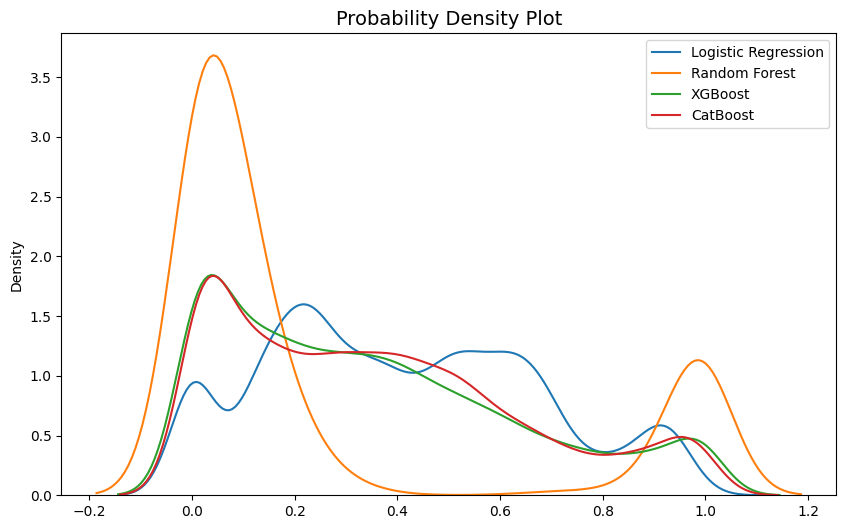

In [63]:
# sets plot size
plt.figure(figsize=(10,6))

# plots
sns.kdeplot(y_pred_lr_prob, label='Logistic Regression')
sns.kdeplot(y_pred_rf_prob, label='Random Forest')
sns.kdeplot(y_pred_xgb_prob, label='XGBoost')
sns.kdeplot(y_pred_catb_prob, label='CatBoost')

# sets the plot features
plt.title("Probability Density Plot", fontsize=14)
plt.legend()

# displays the plot
plt.show()

"The smaller the Brier score, the better, hence the naming with “loss”. Across all items in a set N predictions, the Brier score measures the mean squared difference between (1) the predicted probability assigned to the possible outcomes for item i, and (2) the actual outcome. Therefore, the lower the Brier score is for a set of predictions, the better the predictions are calibrated. Note that the Brier score always takes on a value between zero and one, since this is the largest possible difference between a predicted probability (which must be between zero and one) and the actual outcome (which can take on values of only 0 and 1). The Brier loss is composed of refinement loss and calibration loss."

In [64]:
bsl_lr = brier_score_loss(y_test, y_pred_lr_prob, pos_label=1)
bsl_rf = brier_score_loss(y_test, y_pred_rf_prob, pos_label=1)
bsl_xgb = brier_score_loss(y_test, y_pred_xgb_prob, pos_label=1)
bsl_catb = brier_score_loss(y_test, y_pred_catb_prob, pos_label=1)

# prints the calculated Brier Score Loss for each algorithm probability
print(f'Brier Score Loss (Logistic Regression): {bsl_lr}')
print(f'Brier Score Loss (Random Forest): {bsl_rf}')
print(f'Brier Score Loss (XGBoost): {bsl_xgb}')
print(f'Brier Score Loss (CatBoost): {bsl_catb}')

Brier Score Loss (Logistic Regression): 0.17178735812271473
Brier Score Loss (Random Forest): 0.008235386991114856
Brier Score Loss (XGBoost): 0.1040959607774555
Brier Score Loss (CatBoost): 0.11127465220558802


In [65]:
# As we get a good accuracy in cat boost

# defines the cross validation strategy
cv = StratifiedKFold(n_splits=10)
cv_scores = cross_val_score(catb_clf, X, np.ravel(y), cv = cv, scoring='precision', n_jobs=-1)

# prints the average precision and standard deviation of the scores
print("Average precision: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))


# calculates the cross validation scores
cv_scores = cross_val_score(catb_clf, X, np.ravel(y), cv = cv, scoring='recall', n_jobs=-1)

# prints the average recall and standard deviation of the scores
print("\nAverage recall: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))


# calculates the cross validation scores
cv_scores = cross_val_score(catb_clf, X, np.ravel(y), cv = cv, scoring='f1', n_jobs=-1)

# prints the average f1-score and standard deviation of the scores
print("\nAverage f1-score: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))


# calculates the cross validation scores
cv_scores = cross_val_score(catb_clf, X, np.ravel(y), cv = cv, scoring='roc_auc', n_jobs=-1)

# prints the average roc_auc and standard deviation of the scores
print("\nAverage ROC AUC: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))

Average precision: 0.5039 (+/- 0.4518)

Average recall: 0.3027 (+/- 0.1941)

Average f1-score: 0.3349 (+/- 0.2382)

Average ROC AUC: 0.5983 (+/- 0.2059)


HYPERTUNING

In [69]:
catb_clf = CatBoostClassifier(random_state=SEED, verbose=False)
space = {
    'max_depth': np.arange(2, 10, 2),
    'min_data_in_leaf': [4, 8, 10],
    'learning_rate': np.linspace(0.0001, 0.6, 15),
    'n_estimators': np.arange(10, 105, 15)
}

catb_clf_cv = RandomizedSearchCV(estimator=catb_clf, param_distributions=space,
                                 scoring='f1', cv=5, verbose=2, random_state=SEED, n_jobs=-1)
catb_clf_cv.fit(X_balanced, y_balanced)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7c7211fff0d0>,
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([1.0000e-04, 4.2950e-02, 8.5800e-02, 1.2865e-01, 1.7150e-01,
       2.1435e-01, 2.5720e-01, 3.0005e-01, 3.4290e-01, 3.8575e-01,
       4.2860e-01, 4.7145e-01, 5.1430e-01, 5.5715e-01, 6.0000e-01]),
                                        'max_depth': array([2, 4, 6, 8]),
                                        'min_data_in_leaf': [4, 8, 10],
                                        'n_estimators': array([ 10,  25,  40,  55,  70,  85, 100])},
                   random_state=42, scoring='f1', verbose=2)

In [71]:
catb_clf_cv.best_estimator_

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the threshold
THRESHOLD = 0.45

# Extract the best estimator
catb_tuned_model = catb_clf_cv.best_estimator_

# Make predictions on the test set
y_pred = catb_tuned_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.838153428377461
Precision: 0.5663033605812897
Recall: 0.8402964959568733
F1 Score: 0.6766142159522518


In [74]:
# defines the cross validation strategy
cv = StratifiedKFold(n_splits=10)
# calculates the cross validation scores
cv_scores = cross_val_score(catb_tuned_model, X, np.ravel(y), cv = cv, scoring='precision', n_jobs=-1)

# prints the average precision and standard deviation of the scores
print("Average precision: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))


# calculates the cross validation scores
cv_scores = cross_val_score(catb_tuned_model, X, np.ravel(y), cv = cv, scoring='recall', n_jobs=-1)

# prints the average recall and standard deviation of the scores
print("\nAverage recall: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))


# calculates the cross validation scores
cv_scores = cross_val_score(catb_tuned_model, X, np.ravel(y), cv = cv, scoring='f1', n_jobs=-1)

# prints the average f1-score and standard deviation of the scores
print("\nAverage f1-score: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))


# calculates the cross validation scores
cv_scores = cross_val_score(catb_tuned_model, X, np.ravel(y), cv = cv, scoring='roc_auc', n_jobs=-1)

# prints the average roc_auc and standard deviation of the scores
print("\nAverage ROC AUC: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))

Average precision: 0.4390 (+/- 0.4403)

Average recall: 0.3118 (+/- 0.1829)

Average f1-score: 0.3226 (+/- 0.1954)

Average ROC AUC: 0.5899 (+/- 0.1900)


In [83]:
import pickle
import os

# Define the directory path
directory = 'model'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Other code...

# Save the CatBoost model to a file
with open('model/model_credit_risk.pkl', 'wb') as model_file:
    pickle.dump(catb_tuned_model, model_file)


calibrated model

In [84]:
import pickle

# Load the CatBoost model from the file
with open('model/model_credit_risk.pkl', 'rb') as model_file:
    catb_tuned_model = pickle.load(model_file)


In [87]:
from sklearn.calibration import CalibratedClassifierCV
from catboost import CatBoostClassifier
calibrated_catb=CalibratedClassifierCV()
cv=StratifiedKFold(n_splits=10)
catb_tuned_model.fit(X_balanced,y_balanced)

calibrated_carb=CalibratedClassifierCV(catb_tuned_model,method='isotonic',cv=cv)
calibrated_catb.fit(X_train,y_train)

CalibratedClassifierCV()

In [95]:
# How thresholds affect performance

df_aux=pd.DataFrame(X_test).loc[:,0:6]

df_aux_scaled_back=pd.DataFrame(mms.inverse_transform(df_aux))

df_aux_scaled_back.columns=df_numerical_vars.columns

df_aux_scaled_back

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,28.0,77250.0,1.0,10000.0,9.20,0.13,7.0
1,29.0,99780.0,14.0,6000.0,11.14,0.06,8.0
2,36.0,58000.0,18.0,5000.0,6.62,0.09,16.0
3,28.0,35000.0,4.0,13250.0,10.65,0.38,7.0
4,23.0,38000.0,4.0,10000.0,10.99,0.26,2.0
...,...,...,...,...,...,...,...
7360,30.0,79820.0,4.0,14400.0,13.49,0.18,6.0
7361,26.0,33800.0,4.0,13000.0,13.57,0.38,2.0
7362,30.0,50000.0,6.0,4000.0,14.27,0.08,9.0
7363,24.0,42000.0,8.0,2500.0,15.28,0.06,2.0


In [104]:
# data manipulation
import pickle
import pandas as pd
import numpy as np

# data transformation
from sklearn.preprocessing import MinMaxScaler


class Pipeline(object):

    def __init__(self):
        # sets the home path
        self.home_path = ''

        # loads model
        self.model = pickle.load(
            open(self.home_path + 'model/model_credit_risk.pkl', 'rb'))

        # instantiates the scaler
        self.scaler = pickle.load(
            open(self.home_path + 'parameter/numerical_vars_scaler.pkl', 'rb'))

    # scales and encodes the data
    def transform(self, input_data):
        data = input_data.copy()

        ##########################
        # SCALING NUMERICAL VARS #
        ##########################

        # selects only numerical data types variables
        df_numerical_vars = data.select_dtypes(
            include=['int64', 'float64']).drop('loan_status', axis=1)

        # applies the scaler
        scaled_numerical = self.scaler.transform(df_numerical_vars)

        # gets the Data Frame version of numerical scaled for later manipulation
        df_scaled_numerical = pd.DataFrame(scaled_numerical)

        # renaming the columns of result Data Frame
        df_scaled_numerical.columns = df_numerical_vars.columns

        #############################
        # ENCODING CATEGORICAL VARS #
        #############################

        # creates data sets for non-numeric data
        cred_str = data.select_dtypes(include=['object'])

        # One-hot encode the non-numeric columns
        cred_str_onehot = pd.get_dummies(cred_str)

        # union the one-hot encoded columns to the numeric ones
        df_cr_loan_prep = pd.concat(
            [df_scaled_numerical, cred_str_onehot], axis=1)

        return df_cr_loan_prep

    def predict(self, input_data):
        transformed_data = self.transform(input_data)

        predictions = self.model.predict_proba(transformed_data)

        return predictions

In [105]:
def prepare_data_for_calculation(data_frame, probs):

    # defines probabilities Data Frame
    df_probs = pd.DataFrame(probs[:, 1])
    df_probs.columns = ['prob_default']

    # concatenates the probabilities with the respective loan amount
    df_prep = pd.concat(
        [df_probs, data_frame[['loan_amnt']].reset_index()], axis=1)

    # drops unused column
    df_prep.drop('index', axis=1, inplace=True)

    return df_prep


def calculate_total_expected_loss(data_frame, probs, lgd, ead):

    # calls the function to prepare the Data Frame
    data = prepare_data_for_calculation(data_frame, probs)

    # sets the loss given default
    data['loss_given_default'] = lgd

    # calculates the bank's expected loss and assign it to a new column
    data['expected_loss'] = data['prob_default'] * \
        data['loss_given_default'] * (data['loan_amnt'] * ead)

    # calculates the total expected loss to two decimal places
    total_exp_loss = round(np.sum(data['expected_loss']), 2)

    return total_exp_loss